In [47]:
import pandas as pd
import os,glob
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append(os.path.expanduser("~") + "/collproc/")
from raw import *
from coll import *
import matplotlib.pyplot as plt
sys.path.append(os.path.expanduser("~") + "/ivpy/src")
from ivpy.reduce import pca

In [5]:
g = unpkl('gloss/g.pkl')

In [6]:
x = unpkl('texture/x.pkl')

In [16]:
def closest_to_median_row(df, column_name):
    # Find the median of the given column
    median_val = df[column_name].median()
    
    # Compute the absolute differences between each value and the median
    differences = abs(df[column_name] - median_val)
    
    # Find the index of the smallest difference (i.e., closest to the median)
    idx_closest = differences.idxmin()
    
    # Return the row with the smallest difference
    return idx_closest

In [17]:
idxs = []
for cat in g.cat.unique():
    tmp = g[g.cat==cat]
    median_idx = closest_to_median_row(tmp,'g60')
    idxs.append(median_idx)
g = g.loc[idxs]

In [19]:
idxs = []
for catalog in x.catalog.unique():
    tmp = x[x.catalog==catalog]
    median_idx = closest_to_median_row(tmp,'roughness')
    idxs.append(median_idx)
x = x.loc[idxs]

In [22]:
g = g[['cat','gloss']]

In [25]:
x = x[['catalog','roughness']]

In [30]:
g.columns = ['catalog','gloss']

In [32]:
df = g.merge(x,on='catalog',how='inner')

In [35]:
#pkl(df,'gXt.pkl')

In [38]:
df['ddiff'] = df.gloss.apply(lambda x: x[2] - x[1])

In [40]:
df['g20'] = df.gloss.apply(lambda x: x[0])
df['g60'] = df.gloss.apply(lambda x: x[1])
df['g85'] = df.gloss.apply(lambda x: x[2])

In [42]:
from scipy.stats import pearsonr

In [43]:
for col in ['g20','g60','g85']:
    print(col,"\n",pearsonr(df.roughness,df[col]))

g20 
 (-0.3905803431901817, 3.1131869970490547e-191)
g60 
 (-0.5048406112829376, 0.0)
g85 
 (-0.5214828182328801, 0.0)


In [44]:
pearsonr(df.roughness,df.ddiff)

(-0.04932773769011912, 0.0003455395365228378)

In [60]:
pearsonr(df.roughness,df.ddiff.apply(abs))

(-0.29661578612188905, 2.746712097390095e-107)

In [50]:
df['gpca'] = pca(df.iloc[:,-3:],n_components=1)

In [51]:
pearsonr(df.roughness,df.gpca)

(-0.5041574611215581, 0.0)

In [62]:
df['sdiff'] = df.gloss.apply(lambda x: x[1] - x[0])

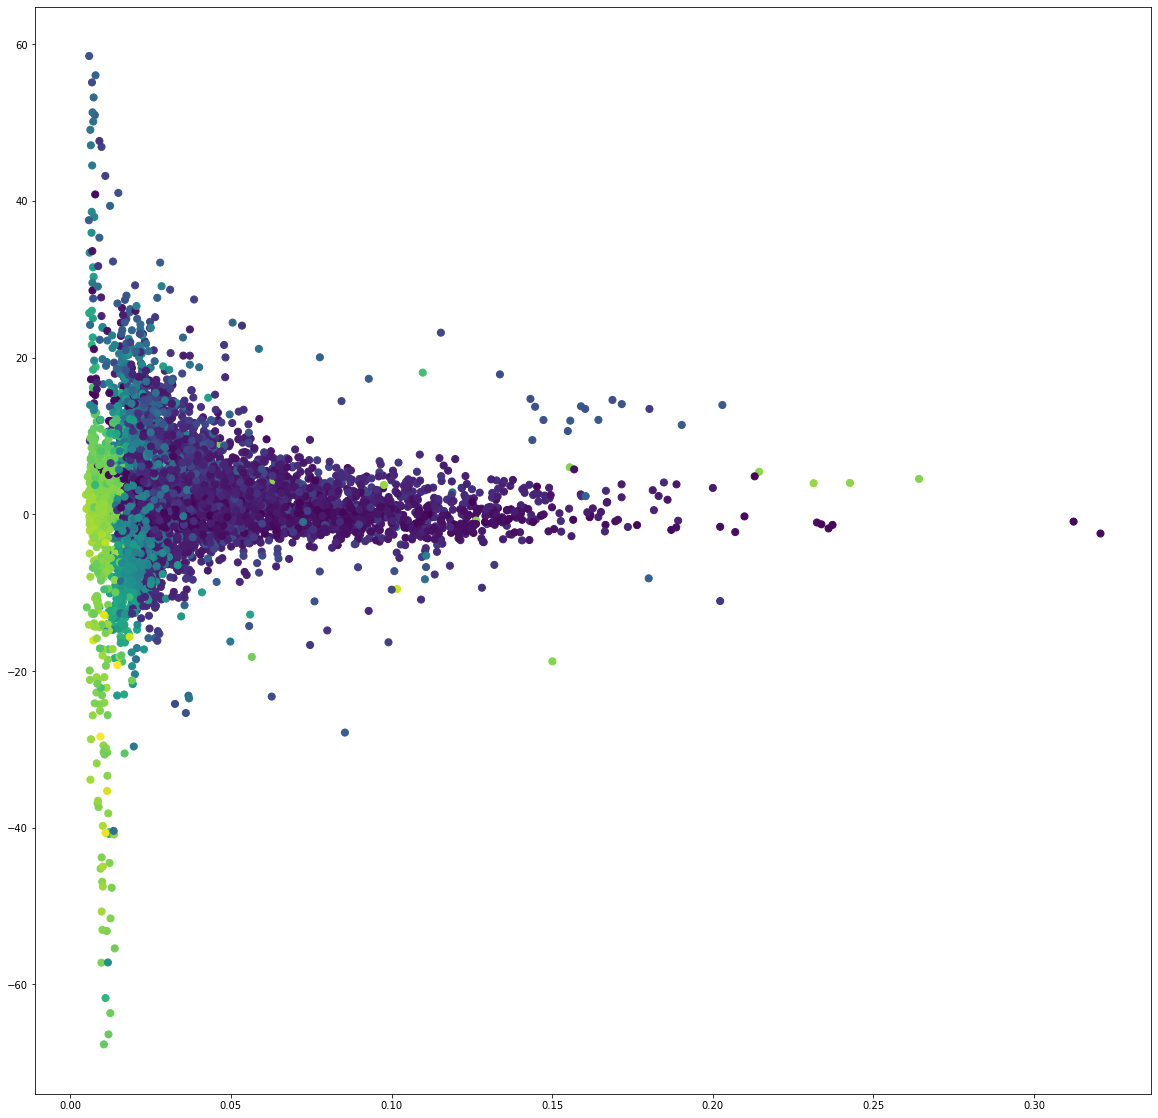

In [93]:
plt.figure(figsize=(20,20))
plt.scatter(df.roughness,df.ddiff,s=50,c=df.g60,cmap='viridis')

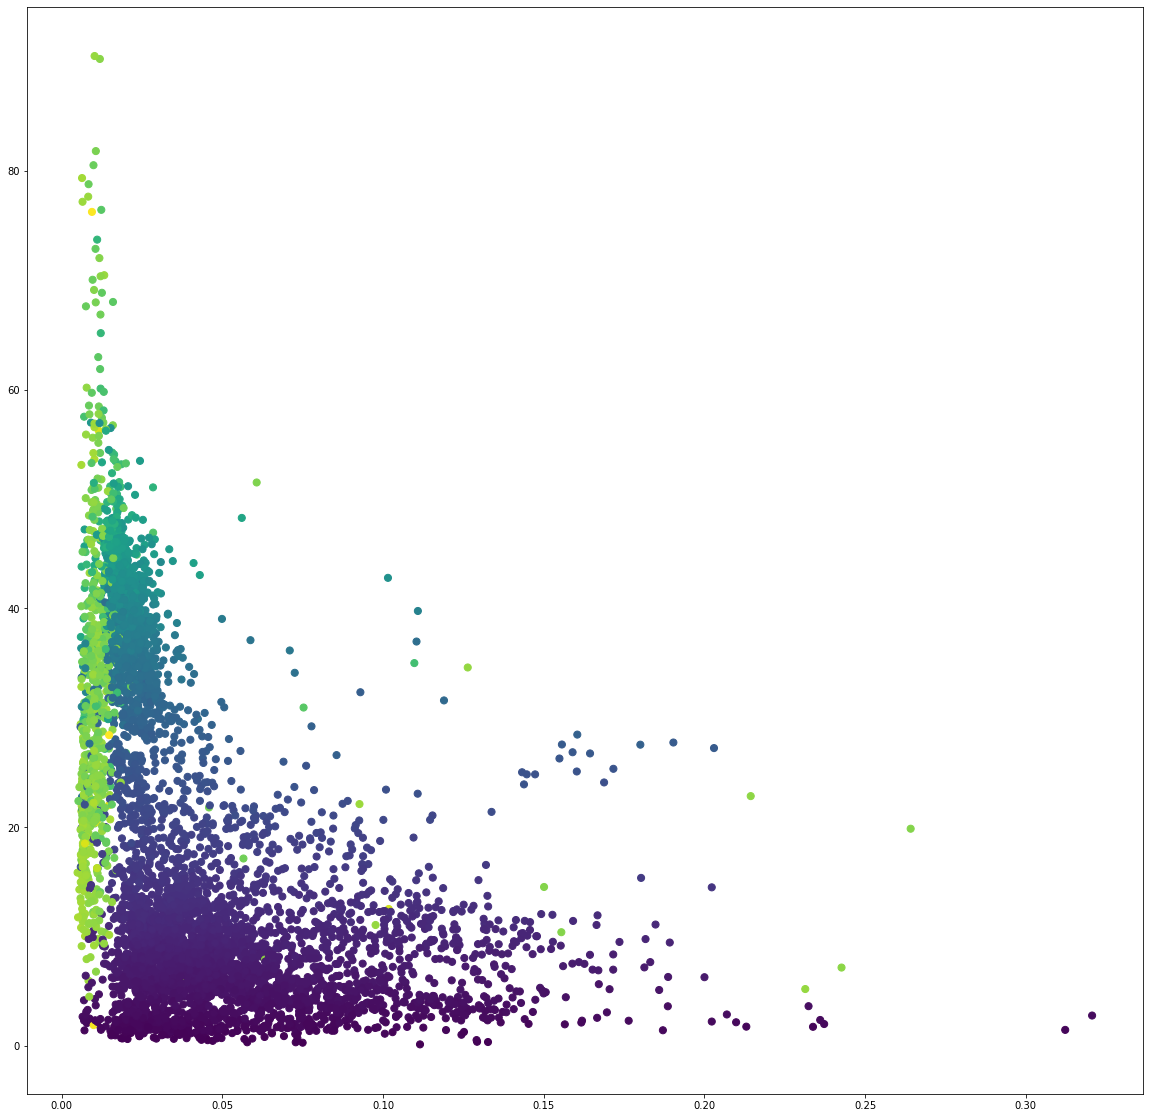

In [94]:
plt.figure(figsize=(20,20))
plt.scatter(df.roughness,df.sdiff,s=50,c=df.g60,cmap='viridis')

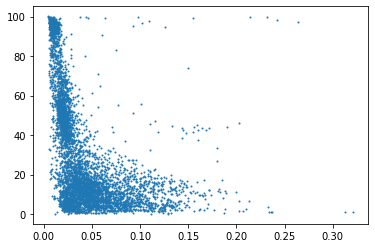

In [59]:
plt.scatter(df.roughness,df.g85,s=1)

In [64]:
pearsonr(df.roughness,df.sdiff)

(-0.4701288847435812, 1.7548100024744356e-287)

In [66]:
pearsonr(df.roughness,df.sdiff.apply(abs))

(-0.4701288847435812, 1.7548100024744356e-287)

In [67]:
len(df)

5259

In [69]:
df[['pc1','pc2']] = pca(df[['g20','g60','g85']],n_components=2)

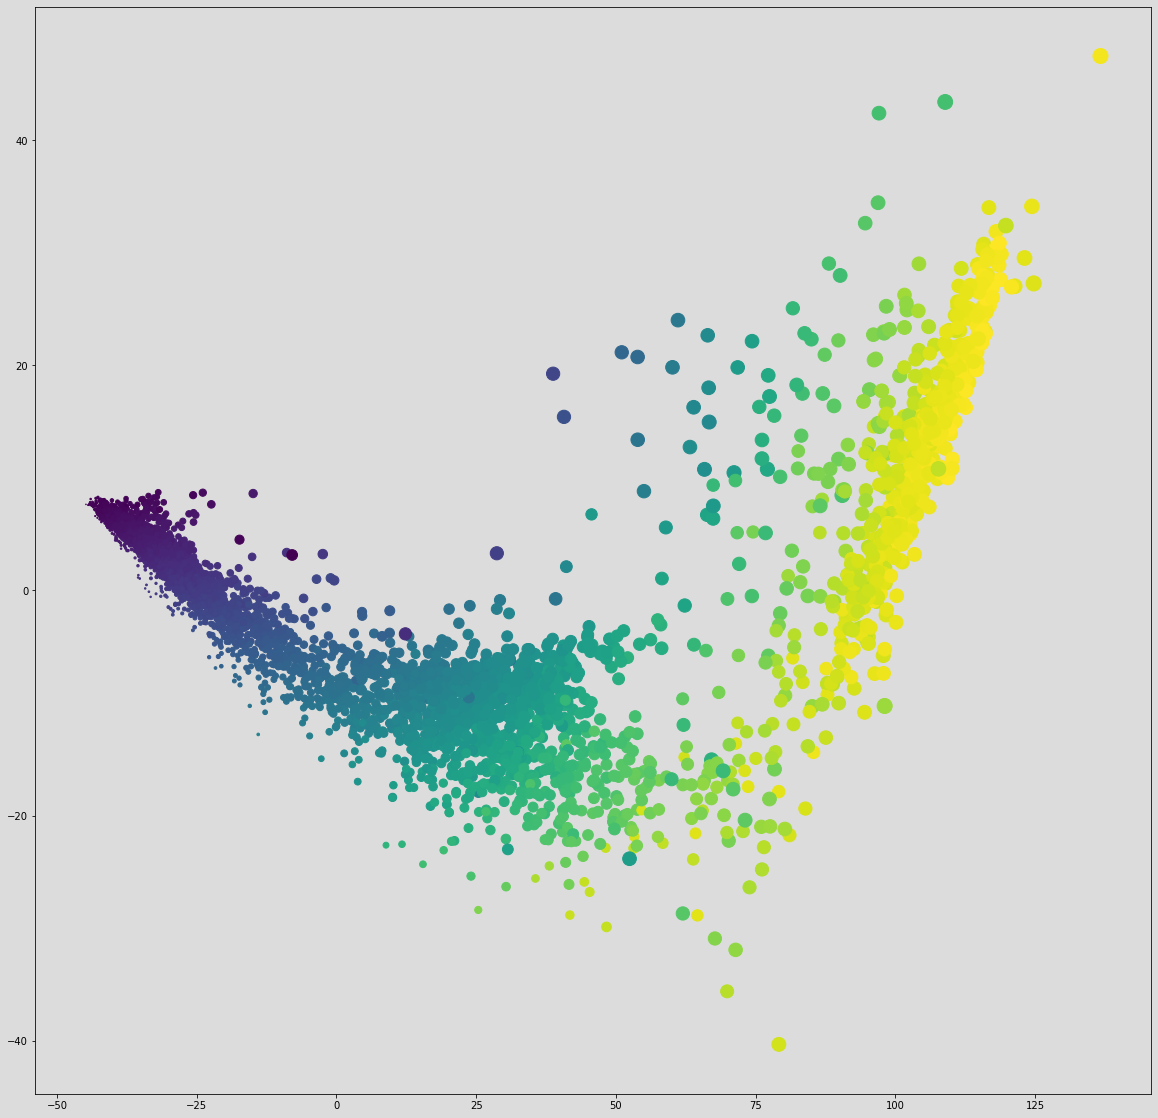

In [85]:
plt.figure(figsize=(20,20))
plt.scatter(df.pc1,df.pc2,s=df.g60 * 2,c=df.g85,cmap='viridis')
plt.gca().set_facecolor('gainsboro')
plt.gcf().set_facecolor('gainsboro')

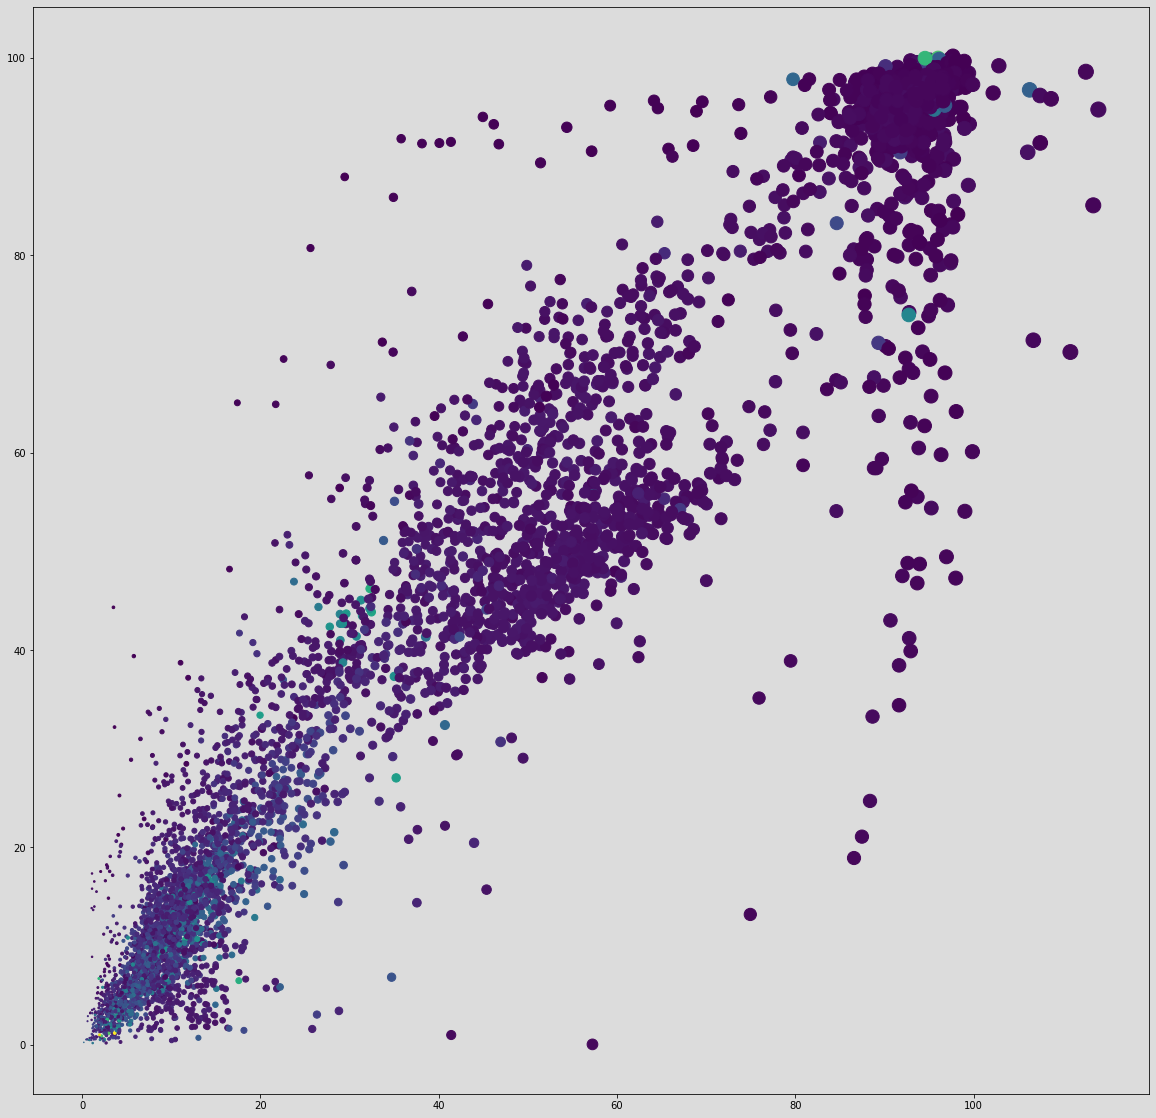

In [87]:
plt.figure(figsize=(20,20))
plt.scatter(df.g60,df.g85,s=df.g60 * 2,c=df.roughness,cmap='viridis')
plt.gca().set_facecolor('gainsboro')
plt.gcf().set_facecolor('gainsboro')

In [97]:
df[(df.roughness > 0.1)&(df.g60 > 90)]

,catalog,gloss,roughness,ddiff,g20,g60,g85,gpca,sdiff,pc1,pc2
185,347,"[93.78198, 106.2836, 96.74946]",0.101742,-9.53414,93.78198,106.28360,96.74946,124.436682,12.50162,124.436682,34.128842
887,4122,"[82.67973, 93.05895, 99.05459]",0.155467,5.99564,82.67973,93.05895,99.05459,112.747414,10.37922,112.747414,24.444322
2996,4225,"[87.13831, 94.28471, 98.28199]",0.242670,3.99728,87.13831,94.28471,98.28199,114.895526,7.14640,114.895526,28.604105
3034,5030,"[90.83252, 96.01479, 99.97124]",0.231384,3.95645,90.83252,96.01479,99.97124,118.627711,5.18227,118.627711,30.870921
3089,2401,"[71.72412, 94.54911, 99.95844]",0.214408,5.40933,71.72412,94.54911,99.95844,109.746949,22.82499,109.746949,14.321690
3097,2400,"[73.16146, 93.00407, 97.51373]",0.264188,4.50966,73.16146,93.00407,97.51373,107.779295,19.84261,107.779295,16.881497
3223,5407r,"[60.98633, 95.57349, 94.77143]",0.126334,-0.80206,60.98633,95.57349,94.77143,102.639572,34.58716,102.639572,7.356012
4030,992,"[78.20679, 92.72226, 73.94672]",0.150086,-18.77554,78.20679,92.72226,73.94672,94.615465,14.51547,94.615465,32.636634
